
<p style="font-size: 2.5em; text-align:center">COVID-19</p><br/>
<p style="font-size: 2.5em; text-align:center">Data Analysis and Visualization</p><br/>
<center style="color:#aaa; margin-top:10px;"><b>Manuel López</b><br>Manuel.Lopez.ds@immune.institute</center>


# Subject

The objective of this analysis is to analyze the data that we have available on the pandemic (Covid) and published in the 'European Center for Disease Prevention and Control' at the following url:

https://www.ecdc.europa.eu/en/publications-data/data-national-14-day-notification-rate-covid-19

To download the file, access the url and click on the chosen format: excel, csv, json or xml. In our case in excel format.

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* We load an Excel file with the latest data available.

In [2]:
df=pd.read_excel('descarga1.xlsx')

df.head()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
0,Afghanistan,AFG,Asia,38928341,cases,0,2020-01,NaN,0,"Epidemic intelligence, national weekly data"
1,Afghanistan,AFG,Asia,38928341,cases,0,2020-02,0.0,0,"Epidemic intelligence, national weekly data"
2,Afghanistan,AFG,Asia,38928341,cases,0,2020-03,0.0,0,"Epidemic intelligence, national weekly data"
3,Afghanistan,AFG,Asia,38928341,cases,0,2020-04,0.0,0,"Epidemic intelligence, national weekly data"
4,Afghanistan,AFG,Asia,38928341,cases,0,2020-05,0.0,0,"Epidemic intelligence, national weekly data"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20212 entries, 0 to 20211
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           20212 non-null  object 
 1   country_code      19564 non-null  object 
 2   continent         20212 non-null  object 
 3   population        20212 non-null  int64  
 4   indicator         20212 non-null  object 
 5   weekly_count      20212 non-null  int64  
 6   year_week         20212 non-null  object 
 7   rate_14_day       19772 non-null  float64
 8   cumulative_count  20212 non-null  int64  
 9   source            20212 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.5+ MB


In [4]:
# remove the observations with nans
df = df.dropna()

# remove the column 'source'
df = df.drop(['source'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19136 entries, 1 to 20211
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           19136 non-null  object 
 1   country_code      19136 non-null  object 
 2   continent         19136 non-null  object 
 3   population        19136 non-null  int64  
 4   indicator         19136 non-null  object 
 5   weekly_count      19136 non-null  int64  
 6   year_week         19136 non-null  object 
 7   rate_14_day       19136 non-null  float64
 8   cumulative_count  19136 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.5+ MB


In [5]:
df.describe()

,population,weekly_count,rate_14_day,cumulative_count
count,1.913600e+04,1.913600e+04,19136.000000,1.913600e+04
mean,4.088291e+07,4.794127e+03,45.279835,6.726001e+04
std,1.527238e+08,4.004225e+04,139.491591,5.584740e+05
min,8.090000e+02,-3.864000e+03,-132.596181,0.000000e+00
25%,1.318442e+06,0.000000e+00,0.060880,1.900000e+01
50%,7.275556e+06,2.200000e+01,2.743330,3.590000e+02
75%,2.843594e+07,4.212500e+02,24.377506,6.456000e+03
max,1.439324e+09,1.782792e+06,4345.374136,2.242301e+07


* We list negative values, Checking it seems that they are corrections in the history by the countries. We continue with the data.

In [6]:
df[df['weekly_count'] < 0]

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count
2261,Benin,BEN,Africa,12123198,cases,-148,2020-21,-1.055827,191
5651,Ecuador,ECU,America,17643060,cases,-3864,2020-36,11.420921,109784
9863,Jersey,JEY,Europe,107796,cases,-4,2020-37,5.566069,380
9943,Jordan,JOR,Asia,10203140,cases,-50,2020-30,-0.107810,1168
10449,Kyrgyzstan,KGZ,Asia,6524191,deaths,-439,2020-34,-63.915971,1057
11097,Lithuania,LTU,Europe,2794184,cases,-28,2020-18,3.006244,1410
11222,Luxembourg,LUX,Europe,613894,cases,-1079,2020-35,-132.596181,6625
17196,Spain,ESP,Europe,46937060,deaths,-875,2020-21,1.917461,26834
18895,Uganda,UGA,Africa,45741000,cases,-15,2020-21,0.198946,212


* We select the last week of data.

In [7]:

wlast = df.year_week.drop_duplicates().iloc[-1]
print('The last week with data is:', wlast)
df_last = df[df['year_week'] == wlast]
df_last.head()

The last week with data is: 2021-01


,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count
53,Afghanistan,AFG,Asia,38928341,cases,675,2021-01,4.051033,53584
107,Afghanistan,AFG,Asia,38928341,deaths,71,2021-01,3.365158,2301
260,Albania,ALB,Europe,2862427,cases,4157,2021-01,245.351235,63595
305,Albania,ALB,Europe,2862427,deaths,48,2021-01,26.900249,1241
359,Algeria,DZA,Africa,43851043,cases,1736,2021-01,8.011212,102144


* We see the incidence by Continent for the last week.

In [8]:

df_last.groupby(['continent','indicator']).aggregate({"rate_14_day": ['mean'],
                                       "weekly_count":'sum',
                                       "cumulative_count":'sum'})

rate_14_day weekly_count cumulative_count
                           mean          sum              sum
continent indicator                                          
Africa    cases       43.517229       227221          3059974
          deaths       8.490346         5554            72834
America   cases      186.872425      2699838         39844634
          deaths      23.789193        44783           925925
Asia      cases       79.336575       449444         18549010
          deaths       6.310445         6013           317547
Europe    cases      541.088013      1893913         28291217
          deaths      97.402496        37322           623024
Oceania   cases       29.488739          581            56555
          deaths       5.637717            9             1193

* We list the 10 countries wiht greater number of cases.

In [9]:
df_last[df_last['indicator'] == 'cases'].sort_values(by=['weekly_count'], ascending=False).head(10)
                

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count
19329,United States,USA,America,331002647,cases,1782792,2021-01,988.316870,22423006
19221,United Kingdom,GBR,Europe,66647112,cases,417570,2021-01,1114.255333,3072349
2901,Brazil,BRA,America,212559409,cases,397866,2021-01,304.539330,8131612
15335,Russia,RUS,Europe,145934460,cases,165131,2021-01,237.938318,3425269
17175,Spain,ESP,Europe,46937060,cases,152938,2021-01,495.065094,2111782
7401,Germany,DEU,Europe,83019213,cases,145511,2021-01,324.250243,1921024
16886,South Africa,ZAF,Africa,59308690,cases,130849,2021-01,370.478593,1231597
7011,France,FRA,Europe,67012883,cases,127528,2021-01,329.205356,2783256
8853,India,IND,Asia,1380004385,cases,126126,2021-01,18.748056,10466595
4281,Colombia,COL,America,50882884,cases,126083,2021-01,389.317555,1801903


* We list the countries with greater number of deaths.

In [10]:
df_last[df_last['indicator'] == 'deaths'].sort_values(by=['weekly_count'], ascending=False).head(10)

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count
19383,United States,USA,America,331002647,deaths,22852,2021-01,124.216529,374442
2955,Brazil,BRA,America,212559409,deaths,7562,2021-01,58.529519,203580
12139,Mexico,MEX,America,128932753,deaths,7155,2021-01,89.294611,134368
19275,United Kingdom,GBR,Europe,66647112,deaths,6407,2021-01,154.875428,81431
7455,Germany,DEU,Europe,83019213,deaths,6112,2021-01,127.199471,40686
16931,South Africa,ZAF,Africa,59308690,deaths,3586,2021-01,102.716819,33163
9641,Italy,ITA,Europe,60359546,deaths,3423,2021-01,113.155258,78755
15389,Russia,RUS,Europe,145934460,deaths,3285,2021-01,48.021557,62273
7065,France,FRA,Europe,67012883,deaths,2713,2021-01,69.255340,67750
4325,Colombia,COL,America,50882884,deaths,2486,2021-01,80.125175,46451


* We see the most affected countries in the pandemic so far, what their fatality rate and what is the% of their population infected.

In [11]:
df_c = df[df['indicator'] == 'cases'].groupby('country').agg(
            Region = ('continent','last'),
            cases_cum = ('weekly_count','sum'),
            popul = ('population','last'),
            C14_100K = ('rate_14_day','last'))

df_d = df[df['indicator'] == 'deaths'].groupby('country').agg(
            Region = ('continent','last'),
            deaths_cum = ('weekly_count','sum'))

df_f = df_c.merge(df_d, how='inner', on=['Region','country'])

df_f['letalidad'] = df_f.deaths_cum / df_f.cases_cum *100

df_f['p_popul_inf'] = df_f.cases_cum / df_f.popul * 100

df_f.sort_values(by=['cases_cum'], ascending=False).head(10)


,Region,cases_cum,popul,C14_100K,deaths_cum,letalidad,p_popul_inf
country,,,,,,,
United States,America,22423006,331002647,988.316870,374442,1.669901,6.774268
India,Asia,10466595,1380004385,18.748056,151160,1.444214,0.758447
Brazil,America,8131612,212559409,304.539330,203580,2.503563,3.825571
Russia,Europe,3425269,145934460,237.938318,62273,1.818047,2.347128
United Kingdom,Europe,3072349,66647112,1114.255333,81431,2.650448,4.609876
France,Europe,2783256,67012883,329.205356,67750,2.434199,4.153315
Italy,Europe,2276491,60359546,379.053547,78755,3.459491,3.771551
Spain,Europe,2111782,46937060,495.065094,52275,2.475398,4.499178
Germany,Europe,1921024,83019213,324.250243,40686,2.117933,2.313951


In [12]:
import warnings
warnings.filterwarnings('ignore')

max_c = df_f[df_f['cases_cum'] == max(df_f['cases_cum'])]
max_c['country'] = max_c.index
print('The country with the highest number of cases:', max_c.country[0])

max_d = df_f[df_f['deaths_cum'] == max(df_f['deaths_cum'])]
max_d['country'] = max_d.index
print('The country with the highest number of deaths:', max_d.country[0])

max_l = df_f[df_f['letalidad'] == max(df_f['letalidad'])]
max_l['country'] = max_l.index
print('The country with the highest fatality rate:', max_l.country[0])

max_p = df_f[df_f['p_popul_inf'] == max(df_f['p_popul_inf'])]
max_p['country'] = max_p.index
print('The country with the highest % population infected:', max_p.country[0])

The country with the highest number of cases: United States
The country with the highest number of deaths: United States
The country with the highest fatality rate: Yemen
The country with the highest % population infected: Andorra


* We graph the 14-day index per 100K together with the deaths for the 5 most infected countries and Spain

In [13]:
df_c5 = df_f.nlargest(15,'cases_cum')
df_c5.head()

df_c5_ini = df.merge(df_c5,how='inner',on='country')
display(df_c5_ini.country.unique())
df_c5_ini = df_c5_ini.sort_values(['country','year_week'],ascending=['True','True'])
df_c5_ini.set_index('year_week',inplace=True)
#df_c5_ini.head()

array(['Argentina', 'Brazil', 'Colombia', 'France', 'Germany', 'India',
       'Iran', 'Italy', 'Mexico', 'Poland', 'Russia', 'Spain', 'Turkey',
       'United Kingdom', 'United States'], dtype=object)

- United States

,sum,mean
,weekly_count,weekly_count
indicator,,
cases,22423006,423075.584906
deaths,374442,7064.943396


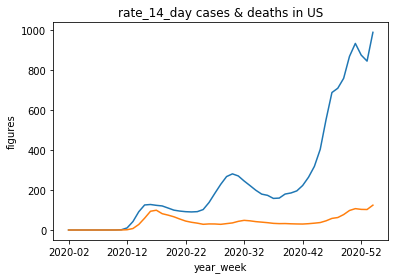

In [14]:
df_c5_ini.query("country=='United States' & indicator == 'cases'")['rate_14_day'].plot()
df_c5_ini.query("country=='United States' & indicator == 'deaths'")['rate_14_day'].plot()

plt.ylabel('figures')
plt.title('rate_14_day cases & deaths in US');

df_c5_ini.query("country=='United States'").pivot_table(index='indicator',
                                                        values='weekly_count',
                                                        aggfunc=[np.sum,np.mean])

- India

,sum,mean
,weekly_count,weekly_count
indicator,,
cases,10466595,197482.924528
deaths,151160,2852.075472


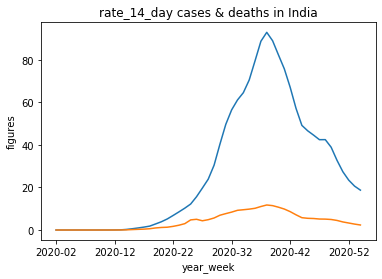

In [15]:
df_c5_ini.query("country=='India' & indicator == 'cases'")['rate_14_day'].plot()
df_c5_ini.query("country=='India' & indicator == 'deaths'")['rate_14_day'].plot()

plt.ylabel('figures')
plt.title('rate_14_day cases & deaths in India');

df_c5_ini.query("country=='India'").pivot_table(index='indicator',
                                                        values='weekly_count',
                                                        aggfunc=[np.sum,np.mean])

- Russia

,sum,mean
,weekly_count,weekly_count
indicator,,
cases,3425269,64627.716981
deaths,62273,1174.962264


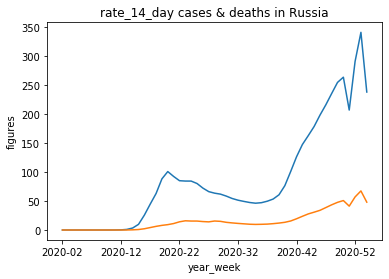

In [16]:
df_c5_ini.query("country=='Russia' & indicator == 'cases'")['rate_14_day'].plot()
df_c5_ini.query("country=='Russia' & indicator == 'deaths'")['rate_14_day'].plot()

plt.ylabel('figures')
plt.title('rate_14_day cases & deaths in Russia');

df_c5_ini.query("country=='Russia'").pivot_table(index='indicator',
                                                        values='weekly_count',
                                                        aggfunc=[np.sum,np.mean])

- Brazil

,sum,mean
,weekly_count,weekly_count
indicator,,
cases,8131612,153426.641509
deaths,203580,3841.132075


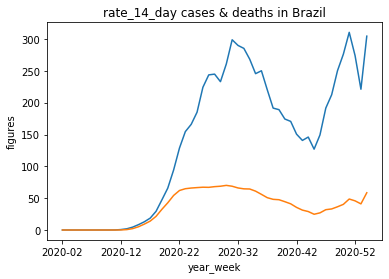

In [17]:
df_c5_ini.query("country=='Brazil' & indicator == 'cases'")['rate_14_day'].plot()
df_c5_ini.query("country=='Brazil' & indicator == 'deaths'")['rate_14_day'].plot()

plt.ylabel('figures')
plt.title('rate_14_day cases & deaths in Brazil');

df_c5_ini.query("country=='Brazil'").pivot_table(index='indicator',
                                                        values='weekly_count',
                                                        aggfunc=[np.sum,np.mean])

- United Kingdom

,sum,mean
,weekly_count,weekly_count
indicator,,
cases,3072349,57968.849057
deaths,81431,1536.433962


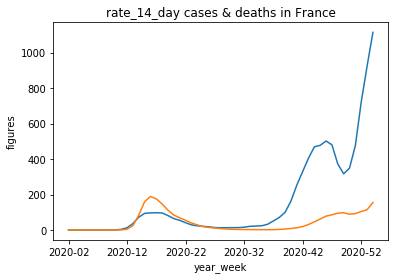

In [18]:
df_c5_ini.query("country=='United Kingdom' & indicator == 'cases'")['rate_14_day'].plot()
df_c5_ini.query("country=='United Kingdom' & indicator == 'deaths'")['rate_14_day'].plot()

plt.ylabel('figures')
plt.title('rate_14_day cases & deaths in France');

df_c5_ini.query("country=='United Kingdom'").pivot_table(index='indicator',
                                                        values='weekly_count',
                                                        aggfunc=[np.sum,np.mean])

- Spain

,sum,mean
,weekly_count,weekly_count
indicator,,
cases,2111782,39844.943396
deaths,52275,986.320755


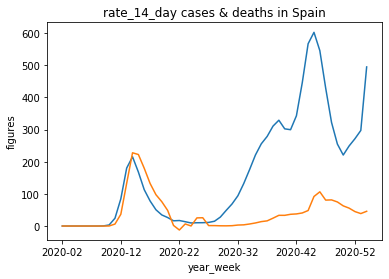

In [19]:
df_c5_ini.query("country=='Spain' & indicator == 'cases'")['rate_14_day'].plot()
df_c5_ini.query("country=='Spain' & indicator == 'deaths'")['rate_14_day'].plot()

plt.ylabel('figures')
plt.title('rate_14_day cases & deaths in Spain');

df_c5_ini.query("country=='Spain'").pivot_table(index='indicator',
                                                        values='weekly_count',
                                                        aggfunc=[np.sum,np.mean])